# Linear modelling: Road distance and map distance

## Summary

### Question of interest

### Data

Road, `float` :
road distance between two locations in Sheffield

Map, `float` :
map distance (ie, straight line) between two locations in Sheffield

### Method

- Data modelled using simple linear regression through the origin
- Data, model, and prediction intervals plotted
- Assumptions of the distribution of the residuals checked with a
  residual plot, normal probability plot, and hypothesis test
  $H_{0} : \beta = 0$

### Summary results

```python
results{'beta': 1.289, 'tstat_beta': 42.803, 'pval_beta': 0.000, "dof": 11}
```

### Discussion

### Output

<!--Add path to FinishingM248-->

### Reference

m248.c.act5

-----

## Results

### Setup the notebook

In [23]:
# import packages and modules
from scipy import stats
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import statsmodels.api as sm
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# set seaborn theme
sns.set_theme()

In [3]:
# change wkdir and import the data
os.chdir("..\\")

### Import the data

In [4]:
conn = sqlite3.connect("data\\source.db3")
data = pd.read_sql_query("SELECT * FROM road_map_distance", conn)

In [5]:
data.head()

,Road,Map
0,10.7,9.5
1,11.7,9.8
2,6.5,5.0
3,25.6,19.0
4,29.4,23.0


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Road,20.0,20.855,9.611094,6.5,13.575,19.05,28.850,40.5
Map,20.0,16.130,7.337151,4.8,11.000,14.90,21.775,28.2


### Model the data

In [7]:
X = data["Map"]
y = data["Road"]

In [8]:
model = sm.OLS(y, X).fit()
model.params

Map    1.289072
dtype: float64

### Visualise the model

In [45]:
model.get_prediction()

<bound method RegressionResults.get_prediction of <statsmodels.regression.linear_model.OLSResults object at 0x00000115AF412910>>

In [33]:
# get prediction interval for mean response
predstd, pred_iv_l, pred_iv_u  = sm_pred(model)

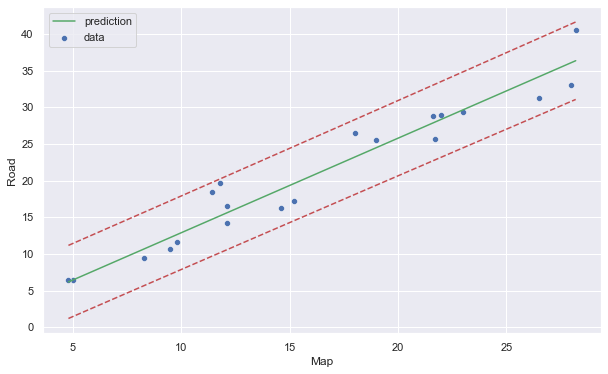

In [48]:
# plot data and model
plt.subplots(figsize=(10,6))
sns.scatterplot(x=X, y=y, label="data")
sns.lineplot(x=X, y=model.predict(), color="g", label="prediction")
# add predint mean response
sns.lineplot(x=X, y=pred_iv_u, color="r", linestyle="--")
sns.lineplot(x=X, y=pred_iv_l, color="r", linestyle="--")
os.chdir("figures")
plt.savefig("distance_fig1")
os.chdir("..")
plt.show()

### Check assumptions of residual values

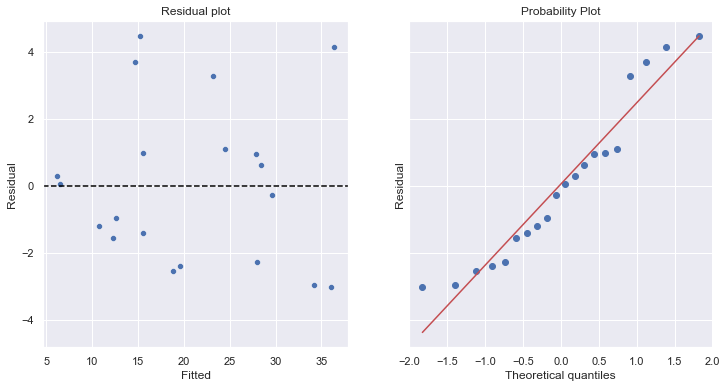

In [21]:
# residual plot and probability plot
f, axs = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
sns.scatterplot(x=model.predict(), y=model.resid, ax=axs[0])
axs[0].set(xlabel="Fitted", ylabel="Residual", title="Residual plot")
axs[0].axhline(y=0, color="black", linestyle="--")
stats.probplot(x=model.resid, plot=axs[1])
axs[1].set(ylabel="Residual")
os.chdir("figures")
plt.savefig("distance_fig2")
os.chdir("..")
plt.show()

In [12]:
# hypoth test: beta = 0
tstat, pval = model.tvalues[0], model.pvalues[0]

In [13]:
tstat, pval

(42.803044497295, 2.325153186257358e-20)